In [36]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests as req
import json
import gmaps
from census import Census
#import seaborn as sns
from config import census_key,gkey,ow_key
c = Census(census_key, year=2016)


In [37]:
#%config InlineBackend.figure_format = 'svg'
%matplotlib inline


# set neat seaborn whitegrid styles for matplotlib charts
plt.style.use('seaborn')
#sns.set_style('whitegrid')

In [3]:
#import data
crime_data_df = pd.read_csv("Crimes_2017.csv")
#Drop nulls
crime_data_modified = crime_data_df.dropna()
#Drop duplicates
crime_data = crime_data_modified.drop_duplicates("ID")
#Sorting and reindexing
crime_data_complete = crime_data.sort_values("Date",ascending = True).reset_index(drop=True)

#print information
crime_data_complete.head()



,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10806541,JA105454,01/01/2017 01:00:00 AM,027XX N HALSTED ST,0890,THEFT,FROM BUILDING,BAR OR TAVERN,False,False,...,43.0,7,06,1170459.0,1918651.0,2017,02/14/2017 03:49:42 PM,41.932267,-87.648997,"(41.932266737, -87.648996818)"
1,11136570,JA494707,01/01/2017 01:00:00 AM,032XX N MILWAUKEE AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,...,31.0,21,11,1149581.0,1921382.0,2017,02/09/2018 03:44:29 PM,41.940192,-87.725650,"(41.940192486, -87.725649965)"
2,10801445,JA100423,01/01/2017 01:00:00 AM,053XX S SACRAMENTO AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,14.0,63,14,1157290.0,1868864.0,2017,02/14/2017 03:49:42 PM,41.795924,-87.698744,"(41.795924251, -87.698743638)"
3,10801159,JA100113,01/01/2017 01:00:00 AM,024XX N CLARK ST,0890,THEFT,FROM BUILDING,BAR OR TAVERN,False,False,...,43.0,7,06,1172470.0,1916952.0,2017,02/14/2017 03:49:42 PM,41.927560,-87.641657,"(41.927560326, -87.641657079)"
4,10801999,JA101094,01/01/2017 01:00:00 AM,022XX W TAYLOR ST,1310,CRIMINAL DAMAGE,TO PROPERTY,OTHER,False,False,...,25.0,28,14,1161384.0,1895532.0,2017,02/14/2017 03:49:42 PM,41.869020,-87.682990,"(41.869020308, -87.682990267)"


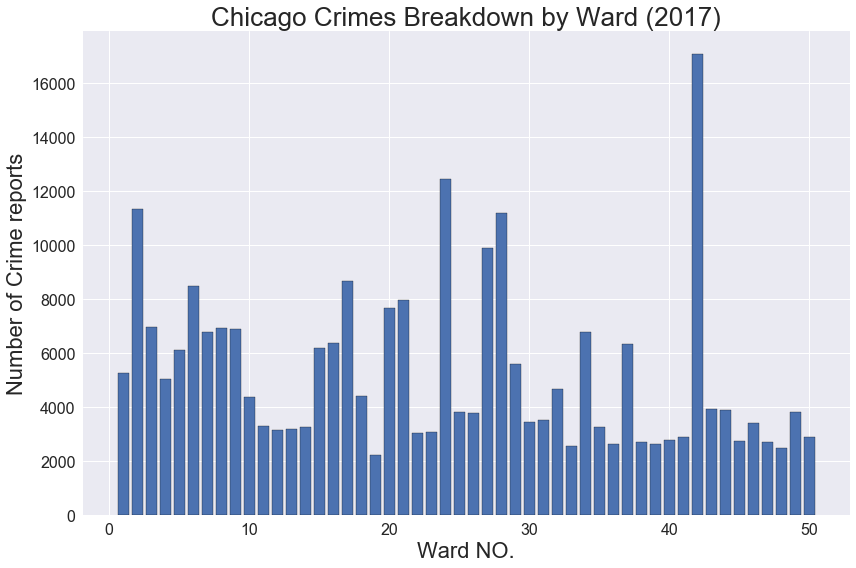

In [41]:
#Number of crimes for Wards involved in crimes
wards = crime_data_complete["Ward"].value_counts()

plt.figure(figsize = (12,8))


#with plt.style.context('seaborn'):
plt.bar(wards.index,wards,edgecolor="k")

plt.title('Chicago Crimes Breakdown by Ward (2017)', fontsize = 26)
plt.xlabel('Ward NO.', fontsize = 22)
plt.ylabel('Number of Crime reports', fontsize = 22)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.tight_layout()
plt.show()

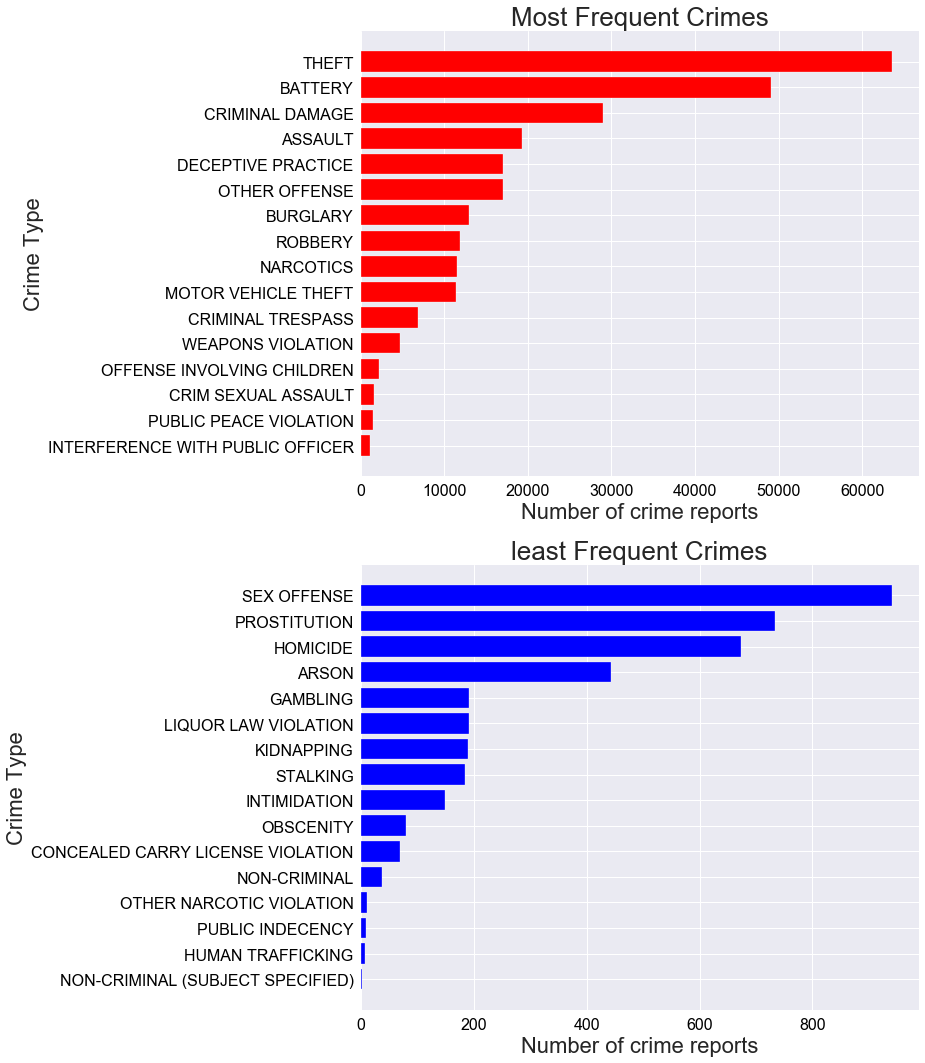

In [40]:
#Crime types
all_crime_types = crime_data_complete["Primary Type"].value_counts().sort_values()
Top_crimes = all_crime_types[all_crime_types>1000]
less_crimes = all_crime_types[all_crime_types<1000]
#plot number of crime types reported 
plt.rcParams["figure.figsize"] = (10,18)
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1)
ax1.barh(Top_crimes.index,width = Top_crimes, color='r')
ax1.set_xlabel("Number of crime reports", fontsize = 22)
ax1.set_ylabel("Crime Type", fontsize = 22)
ax1.set_title("Most Frequent Crimes", fontsize = 26)
ax1.tick_params(axis='y', labelcolor="k", labelsize = 16)
ax1.tick_params(axis='x', labelcolor="k", labelsize = 16)

ax2.barh(less_crimes.index,width = less_crimes, color='b')
ax2.set_xlabel("Number of crime reports", fontsize = 22)
ax2.set_ylabel("Crime Type", fontsize = 22)
ax2.set_title("least Frequent Crimes", fontsize = 26)
ax2.tick_params(axis='y', labelcolor="k", labelsize = 16)
ax2.tick_params(axis='x', labelcolor="k", labelsize = 16)
plt.show()


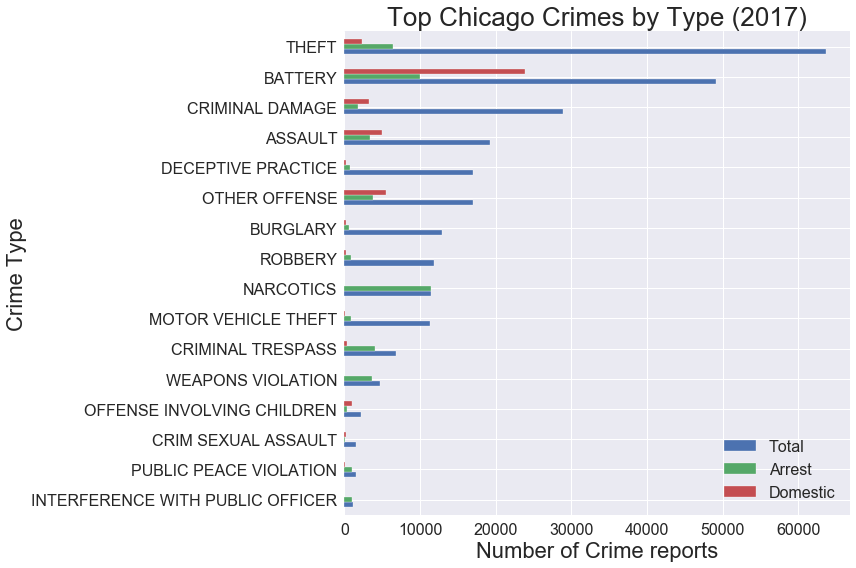

In [45]:
#Crimes breakdown by type
crime_types_group = crime_data_complete[["Primary Type","Arrest","Domestic"]].groupby("Primary Type")
crime_types_group_df = pd.DataFrame(crime_types_group["Primary Type"].count())
crime_types_group_df = crime_types_group_df.rename(columns = {"Primary Type": "Total"})
crime_types_group_df["Arrest"] = crime_types_group["Arrest"].sum()
crime_types_group_df["Domestic"] = crime_types_group["Domestic"].sum()
crime_types_group_df = crime_types_group_df.sort_values("Total", ascending = True)
top_crime_types_group_df = crime_types_group_df[crime_types_group_df["Total"]>1000]
top_crime_types_group_df.plot(kind='barh', figsize=(12,8))
plt.title('Top Chicago Crimes by Type (2017)', fontsize = 26)
plt.xlabel('Number of Crime reports', fontsize = 22)
plt.ylabel('Crime Type', fontsize = 22)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(fontsize = 16)
plt.tight_layout()
plt.show()


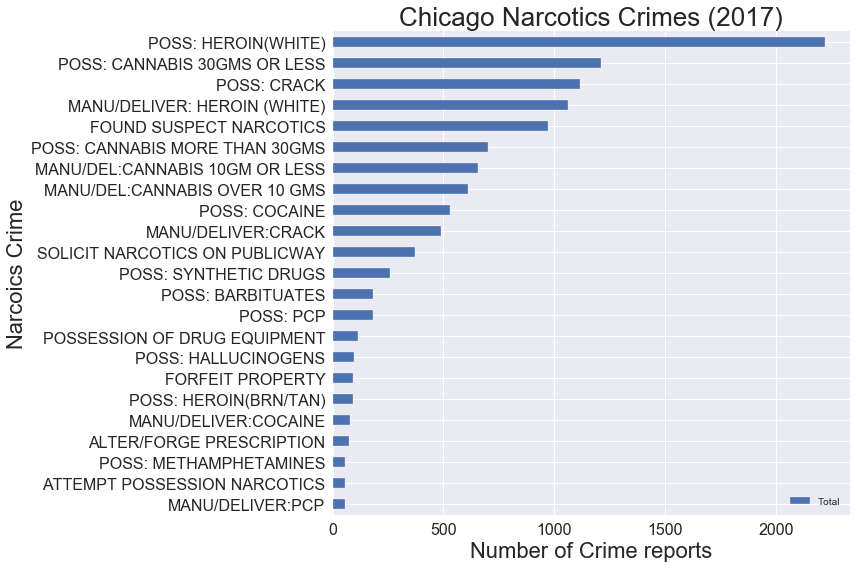

In [46]:
#Chicago Narcotic Crimes by type
narcotics = crime_data_complete[crime_data_complete["Primary Type"]=="NARCOTICS"]
narcotics_types = narcotics[["Description","Arrest","Domestic"]]
narcotics_types_group = narcotics_types.groupby("Description")
narcotics_types_df = pd.DataFrame(narcotics_types_group["Description"].count())
narcotics_types_df = narcotics_types_df.rename(columns = {"Description":"Total"}).sort_values("Total", ascending = True)
Top_narcotics_types_df = narcotics_types_df[narcotics_types_df["Total"]>50]

Top_narcotics_types_df.plot(kind = "barh", figsize = (12,8))
plt.title('Chicago Narcotics Crimes (2017)', fontsize = 26)
plt.xlabel('Number of Crime reports', fontsize = 22)
plt.ylabel('Narcoics Crime', fontsize = 22)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.tight_layout()
plt.show()

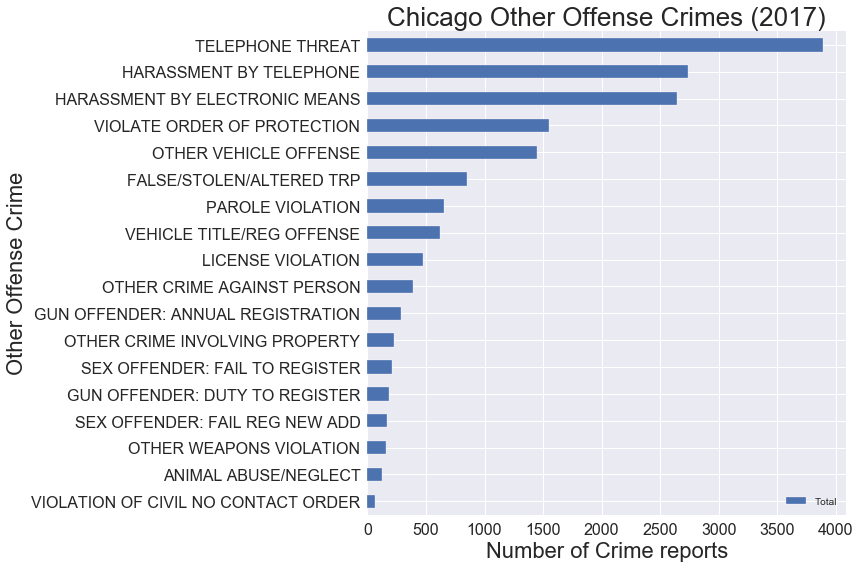

In [48]:
#Chicago Offensive Crimes types
other_offense = crime_data_complete[crime_data_complete["Primary Type"]=="OTHER OFFENSE"]
other_offense_types = other_offense[["Description","Arrest","Domestic"]]
other_offense_types_group = other_offense_types.groupby("Description")
other_offense_types_df = pd.DataFrame(other_offense_types_group["Description"].count())
other_offense_types_df = other_offense_types_df.rename(columns = {"Description":"Total"}).sort_values("Total", ascending = True)
Top_other_offense_types_df = other_offense_types_df[other_offense_types_df["Total"]>50]

#Plot
Top_other_offense_types_df.plot(kind = "barh", figsize = (12,8))
plt.title('Chicago Other Offense Crimes (2017)', fontsize = 26)
plt.xlabel('Number of Crime reports', fontsize = 22)
plt.ylabel('Other Offense Crime', fontsize = 22)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.tight_layout()
plt.show()

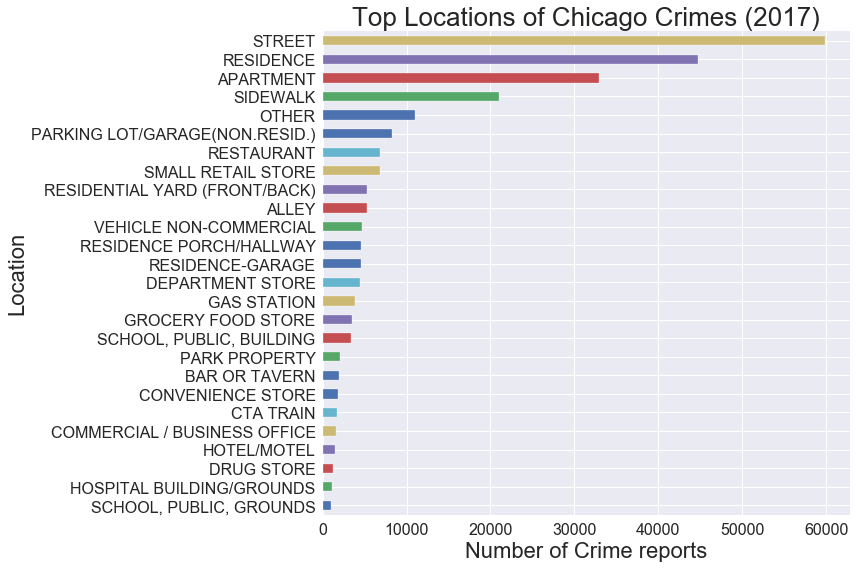

In [51]:
#Top Locations of Chicago Crimes 
location = crime_data_complete["Location Description"].value_counts().sort_values()
top_location = location[location>1000]

#plot
top_location.plot(kind = "barh", figsize=(12,8))
plt.title('Top Locations of Chicago Crimes (2017)',fontsize = 26)
plt.xlabel('Number of Crime reports', fontsize = 22)
plt.ylabel('Location', fontsize = 22)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.tight_layout()
plt.show()

In [52]:
#Changing the type of "Date" column to datetime
crime_data_complete["Date"] = pd.to_datetime(crime_data_complete["Date"])

#Add new columns for different times
L = ["date","time","hour",'year', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter']
crime_data_complete_modified = crime_data_complete.join(pd.concat((getattr(crime_data_complete["Date"].dt, i).rename(i) 
                                                                        for i in L), axis=1))
#days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}
#months = {1:'Jan',2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
#          7:'July',8:"Aug", 9:"Sep", 10:"Oct", 11:"Nav", 12:"dec"}

#crime_data_complete_modified['dayofweek'] = crime_data_complete_modified['dayofweek'].apply(lambda x: days[x])
#crime_data_complete_modified['month'] = crime_data_complete_modified['month'].apply(lambda x: months[x])

#crime_data_complete_modified["Hour"] =crime_data_complete_modified["Date"].dt.hour
#crime_data_complete_modified["Time"] = crime_data_complete_modified["Date"].dt.time
#crime_data_complete_modified["date"] =crime_data_complete_modified["Date"].dt.date
crime_data_complete_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264190 entries, 0 to 264189
Data columns (total 32 columns):
ID                      264190 non-null int64
Case Number             264190 non-null object
Date                    264190 non-null datetime64[ns]
Block                   264190 non-null object
IUCR                    264190 non-null object
Primary Type            264190 non-null object
Description             264190 non-null object
Location Description    264190 non-null object
Arrest                  264190 non-null bool
Domestic                264190 non-null bool
Beat                    264190 non-null int64
District                264190 non-null float64
Ward                    264190 non-null float64
Community Area          264190 non-null int64
FBI Code                264190 non-null object
X Coordinate            264190 non-null float64
Y Coordinate            264190 non-null float64
Year                    264190 non-null int64
Updated On              264190 non-null

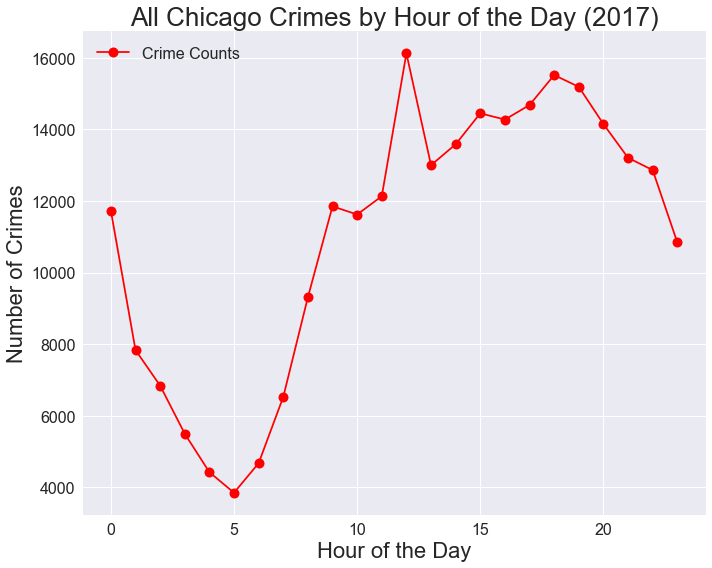

In [53]:
#Total number of Crimes by Hour of the Day
crime_data_complete_modified_groupbytime = crime_data_complete_modified[["Primary Type","hour"]].groupby("hour")
crime_time_df = pd.DataFrame(crime_data_complete_modified_groupbytime["Primary Type"].count())
crime_time_df = crime_time_df.rename(columns = {"Primary Type":"Crime Counts"})
crime_time_df.plot(kind = "line", label = "number of crimes", marker = "o", figsize = (10,8),
                   markersize = 10, color = "r") 
#plot
plt.title('All Chicago Crimes by Hour of the Day (2017)', fontsize = 26)
plt.xlabel('Hour of the Day', fontsize = 22)
plt.ylabel('Number of Crimes', fontsize = 22)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(loc = "upper left",fontsize = 16)
plt.tight_layout()
plt.show()


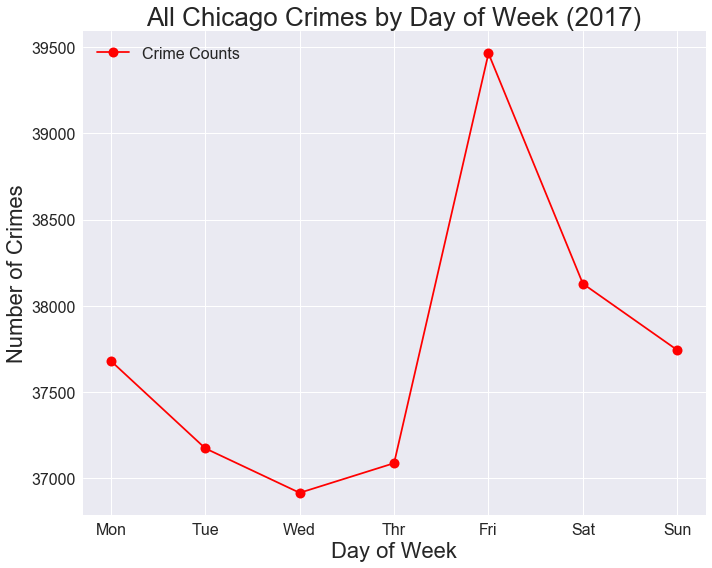

In [56]:
#Total number of Crimes by Day of Week
crime_data_complete_modified_groupbydayofweek = crime_data_complete_modified[["Primary Type","dayofweek"]].groupby("dayofweek")
crime_day_df = pd.DataFrame(crime_data_complete_modified_groupbydayofweek["Primary Type"].count())
crime_day_df = crime_day_df.sort_values("dayofweek")
crime_day_df = crime_day_df.rename(columns = {"Primary Type":"Crime Counts"})

#plot
crime_day_df.plot(kind = "line", label = "number of crimes by Day of Week", marker = "o", figsize = (10,8),
                  markersize = 10, color = "r") 
plt.title('All Chicago Crimes by Day of Week (2017)', fontsize = 26)
plt.xlabel('Day of Week', fontsize = 22)
plt.ylabel('Number of Crimes', fontsize = 22)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(loc = "upper left",fontsize = 16)

plt.xticks(np.arange(7), ("Mon","Tue","Wed","Thr","Fri","Sat","Sun"))
plt.tight_layout()
plt.show()

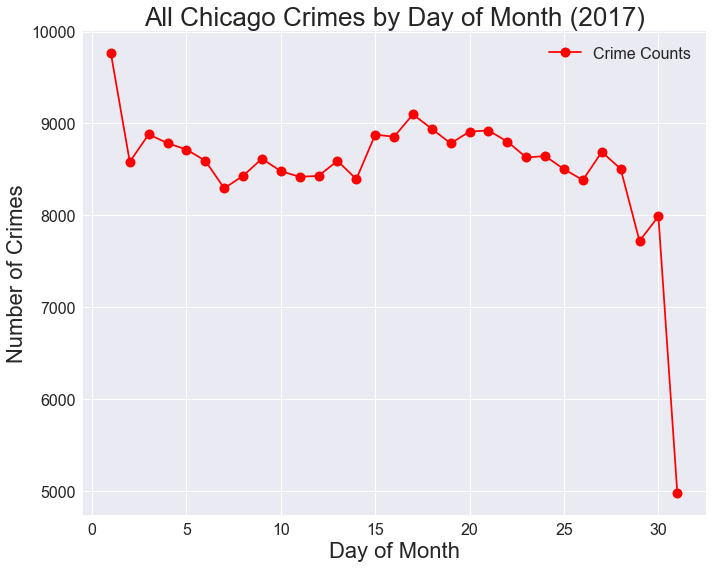

In [60]:
#Total number of Crimes by Day of Month
crime_data_complete_modified_groupbyday = crime_data_complete_modified[["Primary Type","day"]].groupby("day")
crime_daymonth_df = pd.DataFrame(crime_data_complete_modified_groupbyday["Primary Type"].count())
crime_daymonth_df = crime_daymonth_df.sort_values("day")
crime_daymonth_df = crime_daymonth_df.rename(columns = {"Primary Type":"Crime Counts"})

#plot
crime_daymonth_df.plot(kind = "line", label = "number of crimes by Day of Month ", marker = "o", figsize = (10,8),
                       markersize = 10, color = "r") 
plt.title('All Chicago Crimes by Day of Month (2017)', fontsize = 26)
plt.xlabel('Day of Month', fontsize = 22)
plt.ylabel('Number of Crimes', fontsize = 22)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(loc = "best",fontsize = 16)
plt.tight_layout()
plt.show()

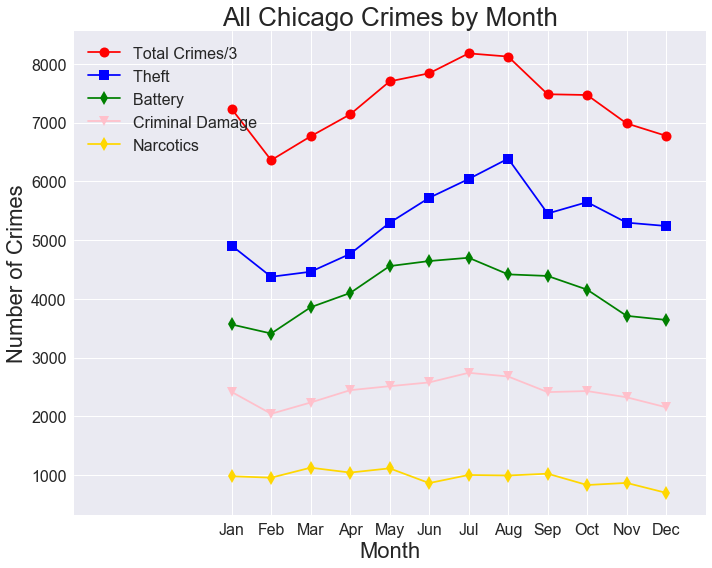

In [62]:
#Total number of Crimes by Month
crime_data_complete_modified_groupbymonth = crime_data_complete_modified[["Primary Type","month"]].groupby("month")
crime_month_df = pd.DataFrame(crime_data_complete_modified_groupbymonth["Primary Type"].count())
crime_month_df = crime_month_df.sort_values("month")

#Theft Crimes by month
theft_crimes_month = crime_data_complete_modified[crime_data_complete_modified["Primary Type"]=="THEFT"].groupby("month")
theft_crimes_month_df = pd.DataFrame(theft_crimes_month["Primary Type"].count())

#Battery Crimes by month
battery_crimes_month = crime_data_complete_modified[crime_data_complete_modified["Primary Type"]=="BATTERY"].groupby("month")
battery_crimes_month_df = pd.DataFrame(battery_crimes_month["Primary Type"].count())

#Narcotic Crimes by month
narcotics_crimes_month = crime_data_complete_modified[crime_data_complete_modified["Primary Type"]=="NARCOTICS"].groupby("month")
narcotics_crimes_month_df = pd.DataFrame(narcotics_crimes_month["Primary Type"].count())

#Criminal Crimes by month
criminal_crimes_month = crime_data_complete_modified[crime_data_complete_modified["Primary Type"]=="CRIMINAL DAMAGE"].groupby("month")
criminal_crimes_month_df = pd.DataFrame(criminal_crimes_month["Primary Type"].count())

#plot
plt.figure(figsize = (10,8))

plt.plot(crime_month_df.index,crime_month_df["Primary Type"]/3, label = "Total Crimes/3", 
         marker = "o", markersize = 10, color = "r")

plt.plot(theft_crimes_month_df.index,theft_crimes_month_df["Primary Type"], 
         label = "Theft ", marker = "s", markersize = 10, color = "b")

plt.plot(battery_crimes_month_df.index,battery_crimes_month_df["Primary Type"], 
         label = "Battery ", marker = "d", markersize = 10, color = "g")
    
plt.plot(criminal_crimes_month_df.index,criminal_crimes_month_df["Primary Type"], 
         label = "Criminal Damage", marker = "v", markersize = 10, color = "pink")
    
plt.plot(narcotics_crimes_month_df.index,narcotics_crimes_month_df["Primary Type"], 
         label = "Narcotics", marker = "d", markersize = 10, color = "gold")

plt.title('All Chicago Crimes by Month (2017)', fontsize = 26)
plt.xlabel('Month', fontsize = 22)
plt.ylabel('Number of Crimes', fontsize = 22)
plt.xticks(fontsize = 16)
plt.xlim(-3,13)
plt.yticks(fontsize = 16)
plt.legend(loc = 0,fontsize = 16)
plt.xticks(np.arange(1,13), ("Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"))
plt.tight_layout()
plt.show()

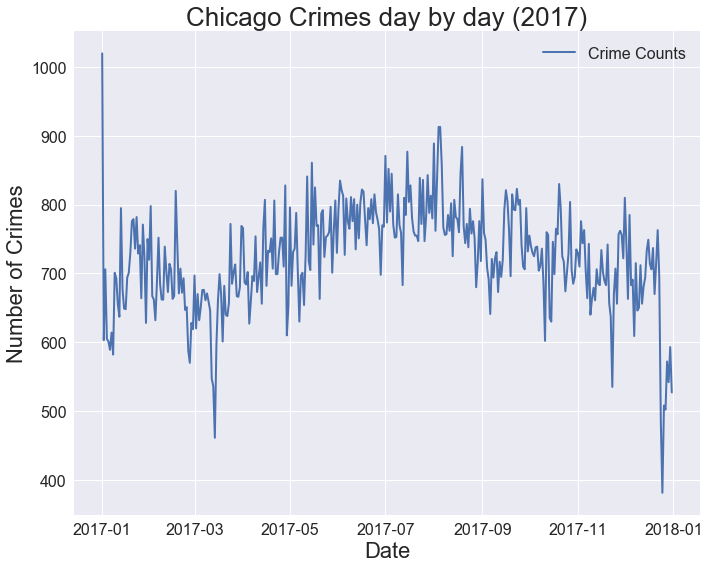

In [63]:
#Crime counts over 2017
crime_data_complete_modified_groupbydate = crime_data_complete_modified[["Primary Type", "date"]].groupby("date")
crime_date_df = pd.DataFrame(crime_data_complete_modified_groupbydate["Primary Type"].count())
crime_date_df = crime_date_df.sort_values("date")
crime_date_df = crime_date_df.rename(columns = {"Primary Type":"Crime Counts"})

#plot
plt.figure(figsize = (10,8))
plt.plot(crime_date_df.index,crime_date_df["Crime Counts"], linewidth = 2)
plt.title('Chicago Crimes day by day (2017)', fontsize = 26)
plt.xlabel('Date', fontsize = 22)
plt.ylabel('Number of Crimes', fontsize = 22)
plt.xticks(fontsize = 16)

plt.yticks(fontsize = 16)
plt.legend(loc = 0,fontsize = 16)
plt.tight_layout()
plt.show()

In [65]:
#Separate a sample of data 
sample_data = crime_data_complete.sample(frac=0.001).reset_index(drop=True)

In [66]:
# Finding zipcode for each location(latitude and longitude):
sample_data["Zipcode"] = ""

# Build URL using the Google Maps API
base_url = "https://maps.googleapis.com/maps/api/geocode/json"

params = {"key": gkey}
count = 0
for index,row in sample_data.iterrows():
    lat = row["Latitude"]
    lng = row["Longitude"]
    target_loc = f"{lat},{lng}"
    params["address"] = target_loc
    response = req.get(base_url, params=params).json()
    try:
        sample_data.loc[index,"Zipcode"] = int(response["results"][0]["address_components"][7]["long_name"])
    except:
        try:
            sample_data.loc[index,"Zipcode"] = int(response["results"][0]["address_components"][8]["long_name"])
        except:
            try:
                sample_data.loc[index,"Zipcode"] = int(response["results"][0]["address_components"][6]["long_name"])
            except:
                try:
                    sample_data.loc[index,"Zipcode"] = int(response["results"][1]["address_components"][7]["long_name"])
                except:
                        try:
                            sample_data.loc[index,"Zipcode"] = int(response["results"][1]["address_components"][8]["long_name"])
                        except:
                            try:
                                sample_data.loc[index,"Zipcode"] = int(response["results"][1]["address_components"][6]["long_name"])
                            except:
                                try:
                                    sample_data.loc[index,"Zipcode"] = int(response["results"][2]["address_components"][7]["long_name"])
                                except:
                                    try:
                                        sample_data.loc[index,"Zipcode"] = int(response["results"][2]["address_components"][8]["long_name"])
                                    except:
                                        count+=1
                                        print(f"NO{count}: no zipcode found for {target_city}")




In [67]:
#Sorting
sample_data = sample_data.sort_values("Date")
sample_data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Zipcode
160,10801876,JA100982,2017-01-01 20:00:00,008XX N SACRAMENTO BLVD,0820,THEFT,$500 AND UNDER,STREET,False,False,...,23,06,1156058.0,1905752.0,2017,02/14/2017 03:49:42 PM,41.897174,-87.702267,"(41.897174047, -87.702267476)",60622
188,10803325,JA102399,2017-01-03 07:45:00,010XX N MONTICELLO AVE,2024,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False,...,23,18,1151857.0,1906622.0,2017,02/14/2017 03:49:42 PM,41.899645,-87.717674,"(41.89964517, -87.717674316)",60651
148,10807687,JA105620,2017-01-05 09:30:00,079XX S LAFAYETTE AVE,0820,THEFT,$500 AND UNDER,CTA TRAIN,False,False,...,44,06,1177312.0,1852570.0,2017,02/14/2017 03:49:42 PM,41.750783,-87.625814,"(41.750782715, -87.625813624)",60620
194,10863845,JA170094,2017-01-09 22:00:00,016XX S MILLARD AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,False,...,29,06,1152309.0,1891589.0,2017,02/10/2018 03:50:01 PM,41.858384,-87.716411,"(41.858384098, -87.716411012)",60623
232,10811905,JA111308,2017-01-10 22:18:00,119XX S MICHIGAN AVE,3710,INTERFERENCE WITH PUBLIC OFFICER,RESIST/OBSTRUCT/DISARM OFFICER,SMALL RETAIL STORE,True,False,...,53,24,1178981.0,1825999.0,2017,02/10/2018 03:50:01 PM,41.677831,-87.620504,"(41.677830552, -87.620503762)",60628


In [68]:
#Check the data
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 160 to 121
Data columns (total 23 columns):
ID                      264 non-null int64
Case Number             264 non-null object
Date                    264 non-null datetime64[ns]
Block                   264 non-null object
IUCR                    264 non-null object
Primary Type            264 non-null object
Description             264 non-null object
Location Description    264 non-null object
Arrest                  264 non-null bool
Domestic                264 non-null bool
Beat                    264 non-null int64
District                264 non-null float64
Ward                    264 non-null float64
Community Area          264 non-null int64
FBI Code                264 non-null object
X Coordinate            264 non-null float64
Y Coordinate            264 non-null float64
Year                    264 non-null int64
Updated On              264 non-null object
Latitude                264 non-null float64
Longitud

In [69]:
#Get some Census data
census_data = c.acs5.get(("NAME",
                          "B19013_001E",
                          "B01003_001E",
                          "B01002_001E",
                          "B19301_001E",
                          "B17001_002E",
                          "B23025_005E",
                          "B02001_003E",
                          "B02001_002E",
                          "B15003_002E",
                          "B15003_017E",
                          "B15003_018E",
                          "B15003_021E",
                          "B15003_022E",
                          "B15003_023E",
                          "B15003_024E",
                          "B15003_025E"),{'for': 'zip code tabulation area:*'})

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column Reordering
census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "B23025_005E": "Unemployment Count",
                                      "B02001_003E": "African-American population",
                                      "B02001_002E": "White population",
                                      "B15003_002E": "No Education",
                                      "B15003_017E": "High School Education",
                                      "B15003_018E": "General Education Development",
                                      "B15003_021E": "Associate Degree",
                                      "B15003_022E": "Bachelor Degree",
                                      "B15003_023E": "Master Degree",
                                      "B15003_024E": "professional Degree",
                                      "B15003_025E": "Doctrate Degree",
                                      "NAME": "Name", "zip code tabulation area": "Zipcode"})

# Add in Poverty Rate (Poverty Count / Population)
census_pd["Poverty Rate"] = 100 * \
    census_pd["Poverty Count"].astype(
        int) / census_pd["Population"].astype(int)

# Add in Unemployment Rate (Unemployment Count / Population)
census_pd["Unemployment Rate"] = 100 * \
    census_pd["Unemployment Count"].astype(
        int) / census_pd["Population"].astype(int)

# Add in African-American population Rate (African-American population Count / Population)
census_pd["% African-American population"] = 100 * \
    census_pd["African-American population"].astype(
        int) / census_pd["Population"].astype(int)

# Add in White population Rate (White population Count / Population)
census_pd["% White population"] = 100 * \
    census_pd["White population"].astype(
        int) / census_pd["Population"].astype(int)

# Add Low Educated percentage column
census_pd["% Low Educated"] = 100*(census_pd["No Education"].astype(int)+census_pd["High School Education"].astype(int)
                               +census_pd["General Education Development"].astype(int)) / census_pd["Population"].astype(int)

# Add High Educated percentage column
census_pd["% High Educated"] = 100*(census_pd["Associate Degree"].astype(int)+census_pd["Bachelor Degree"].astype(int)
                               +census_pd["Master Degree"].astype(int)+census_pd["professional Degree"].astype(int)
                                   +census_pd["Doctrate Degree"].astype(int)) / census_pd["Population"].astype(int)
# Final DataFrame
census_pd = census_pd[["Zipcode", "Population", "Median Age", "Household Income",
                       "Per Capita Income", "Poverty Rate", "% African-American population",
                      "% White population","% Low Educated","% High Educated"]]

census_pd = census_pd.dropna()

# Visualize
print(census_pd.info())
census_pd.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32515 entries, 0 to 33119
Data columns (total 10 columns):
Zipcode                          32515 non-null object
Population                       32515 non-null float64
Median Age                       32515 non-null float64
Household Income                 32515 non-null float64
Per Capita Income                32515 non-null float64
Poverty Rate                     32515 non-null float64
% African-American population    32515 non-null float64
% White population               32515 non-null float64
% Low Educated                   32515 non-null float64
% High Educated                  32515 non-null float64
dtypes: float64(9), object(1)
memory usage: 2.7+ MB
None


,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Rate,% African-American population,% White population,% Low Educated,% High Educated
0,01001,17423.0,45.0,56714.0,30430.0,8.391207,1.469322,91.683407,22.820410,28.399242
1,01002,29970.0,23.2,48923.0,26072.0,27.864531,5.709042,78.274942,6.306306,31.508175
2,01003,11296.0,19.9,2499.0,3829.0,0.478045,5.842776,77.000708,0.061969,0.132790
3,01005,5228.0,44.1,70568.0,32169.0,4.399388,2.008416,96.843917,27.008416,25.267789
4,01007,14888.0,42.5,80502.0,36359.0,9.470715,0.839602,93.404084,15.240462,35.149113


In [70]:
#Separating Chicago Zipcodes 
census_pd = census_pd.set_index("Zipcode")
census_pd_chacago = census_pd.loc[[str(entry) for entry in sample_data["Zipcode"].unique()]]
census_pd_chacago = census_pd_chacago.reset_index()

print(census_pd_chacago.info())
census_pd_chacago.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 10 columns):
Zipcode                          55 non-null object
Population                       54 non-null float64
Median Age                       54 non-null float64
Household Income                 54 non-null float64
Per Capita Income                54 non-null float64
Poverty Rate                     54 non-null float64
% African-American population    54 non-null float64
% White population               54 non-null float64
% Low Educated                   54 non-null float64
% High Educated                  54 non-null float64
dtypes: float64(9), object(1)
memory usage: 4.4+ KB
None


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until


,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Rate,% African-American population,% White population,% Low Educated,% High Educated
0,60622,54467.0,31.8,79085.0,50176.0,15.007252,7.927736,74.408357,9.075220,50.893201
1,60651,61759.0,33.3,34397.0,15705.0,28.593403,56.456549,14.035201,23.739050,11.141696
2,60620,69299.0,39.6,32401.0,17940.0,26.997504,96.598797,1.350669,22.363959,16.345113
3,60623,88137.0,29.3,30048.0,12244.0,37.158061,32.026277,43.307578,18.666394,7.178597
4,60628,68077.0,37.9,35654.0,18433.0,31.108891,94.180120,4.063046,18.856589,17.205517


In [74]:
#changing the type of "Zipcode" column to str
sample_data["Zipcode"] = sample_data["Zipcode"].astype(str) 

#Merging the two dataframes (Crime data and Census data)
merged_census_sample_crime = pd.merge(sample_data, census_pd_chacago, on = "Zipcode", how = "left")
merged_census_sample_crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 0 to 263
Data columns (total 32 columns):
ID                               264 non-null int64
Case Number                      264 non-null object
Date                             264 non-null datetime64[ns]
Block                            264 non-null object
IUCR                             264 non-null object
Primary Type                     264 non-null object
Description                      264 non-null object
Location Description             264 non-null object
Arrest                           264 non-null bool
Domestic                         264 non-null bool
Beat                             264 non-null int64
District                         264 non-null float64
Ward                             264 non-null float64
Community Area                   264 non-null int64
FBI Code                         264 non-null object
X Coordinate                     264 non-null float64
Y Coordinate                     264 non-nu

In [76]:
#Separating the useful column and Drop NaN columns
census_crime = merged_census_sample_crime[['Date','Zipcode','Latitude', 'Longitude','Primary Type',
                                                  'Description', 'Arrest', 'Domestic','Population', 'Median Age', 
                                                  'Household Income','Per Capita Income', 'Poverty Rate',
                                                  '% African-American population','% White population',
                                                  '% Low Educated', '% High Educated']].dropna()


In [78]:
#Groupby Zipcode
census_crime_zipcode_group = census_crime.groupby("Zipcode")

#Making a new DataFrame which shows econocensus information for each Zipcode
census_crime_zipcode_df = pd.DataFrame(census_crime_zipcode_group["Primary Type"].count())
census_crime_zipcode_df = census_crime_zipcode_df.rename(columns = {"Primary Type":"Total Crimes"})
census_crime_zipcode_df["Lat"] = census_crime_zipcode_group["Latitude"].mean()
census_crime_zipcode_df["Lng"] = census_crime_zipcode_group["Longitude"].mean()
census_crime_zipcode_df["Population"] = census_crime_zipcode_group["Population"].mean()

census_crime_zipcode_df["Median Age"] = census_crime_zipcode_group["Median Age"].mean()

census_crime_zipcode_df["Household Income"] = census_crime_zipcode_group["Household Income"].mean()

census_crime_zipcode_df["Per Capita Income"] = census_crime_zipcode_group["Per Capita Income"].mean()

census_crime_zipcode_df["Poverty Rate"] = census_crime_zipcode_group["Poverty Rate"].mean()
census_crime_zipcode_df["% African-American population"] = census_crime_zipcode_group["% African-American population"].mean()

census_crime_zipcode_df["% White population"] = census_crime_zipcode_group["% White population"].mean()

census_crime_zipcode_df["% High Educated"] = census_crime_zipcode_group["% High Educated"].mean()
census_crime_zipcode_df["% Low Educated"] = census_crime_zipcode_group["% Low Educated"].mean()

#Show
census_crime_zipcode_df.head()

,Total Crimes,Lat,Lng,Population,Median Age,Household Income,Per Capita Income,Poverty Rate,% African-American population,% White population,% High Educated,% Low Educated
Zipcode,,,,,,,,,,,,
60176,1,41.977300,-87.899230,11813.0,38.6,52990.0,24025.0,13.629053,1.337510,78.362821,17.878608,25.514264
60302,1,41.880694,-87.774675,32258.0,39.6,79167.0,52608.0,9.603819,22.121644,65.757332,50.985802,7.257115
60601,1,41.887621,-87.618801,13695.0,38.3,103735.0,91679.0,11.266886,7.798467,73.106973,66.308872,5.279299
60604,1,41.879079,-87.624341,619.0,44.6,150125.0,127054.0,16.155089,4.523425,61.550889,70.759289,2.746365
60606,1,41.885904,-87.640087,3011.0,33.0,119973.0,102998.0,5.612753,2.391232,76.751910,83.792760,1.893059


In [79]:
# Configure gmaps with API key
gmaps.configure(api_key=gkey)
# Store 'Lat' and 'Lng' into  locations 
locations = census_crime_zipcode_df[["Lat", "Lng"]].astype(float)

# Convert Poverty Rate to float and store
# HINT: be sure to handle NaN values
Poverty_Rate = census_crime_zipcode_df["Poverty Rate"].astype(float)

# Customize the size of the figure
figure_layout = {
    'width': '600px',
    'height': '1000px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
# Create a poverty Heatmap layer
fig = gmaps.figure(layout = figure_layout)

heat_layer = gmaps.heatmap_layer(locations, weights=Poverty_Rate, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 0.05)

crime_layer = gmaps.symbol_layer(
    census_sample_crime[["Latitude", "Longitude"]], fill_color='rgba(0, 150, 0, 0.4)',
    stroke_color='rgba(0, 0, 150, 0.4)', scale=2)



fig.add_layer(heat_layer)
fig.add_layer(crime_layer)

fig

Figure(layout=FigureLayout(border='1px solid black', height='1000px', margin='0 auto 0 auto', padding='1px', w…

In [80]:
# Configure gmaps with API key
gmaps.configure(api_key=gkey)
# Store 'Lat' and 'Lng' into  locations 
locations = census_crime_zipcode_df[["Lat", "Lng"]].astype(float)

# Convert Poverty Rate to float and store
# HINT: be sure to handle NaN values
weight = census_crime_zipcode_df["Median Age"].astype(float)

# Customize the size of the figure
figure_layout = {
    'width': '600px',
    'height': '1000px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
# Create a poverty Heatmap layer
fig = gmaps.figure(layout = figure_layout)

heat_layer = gmaps.heatmap_layer(locations, weights=weight, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 0.05)

crime_layer = gmaps.symbol_layer(
    census_sample_crime[["Latitude", "Longitude"]], fill_color='rgba(0, 150, 0, 0.4)',
    stroke_color='rgba(0, 0, 150, 0.4)', scale=2)



fig.add_layer(heat_layer)
fig.add_layer(crime_layer)

fig

Figure(layout=FigureLayout(border='1px solid black', height='1000px', margin='0 auto 0 auto', padding='1px', w…

In [81]:
# Configure gmaps with API key
gmaps.configure(api_key=gkey)
# Store 'Lat' and 'Lng' into  locations 
locations = census_crime_zipcode_df[["Lat", "Lng"]].astype(float)

# Convert Poverty Rate to float and store
# HINT: be sure to handle NaN values
weight = census_crime_zipcode_df["% White population"].astype(float)

# Customize the size of the figure
figure_layout = {
    'width': '600px',
    'height': '1000px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
# Create a poverty Heatmap layer
fig = gmaps.figure(layout = figure_layout)

heat_layer = gmaps.heatmap_layer(locations, weights=weight, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 0.05)

crime_layer = gmaps.symbol_layer(
    census_sample_crime[["Latitude", "Longitude"]], fill_color='rgba(0, 150, 0, 0.4)',
    stroke_color='rgba(0, 0, 150, 0.4)', scale=2)



fig.add_layer(heat_layer)
fig.add_layer(crime_layer)

fig

Figure(layout=FigureLayout(border='1px solid black', height='1000px', margin='0 auto 0 auto', padding='1px', w…

In [82]:
# Configure gmaps with API key
gmaps.configure(api_key=gkey)
# Store 'Lat' and 'Lng' into  locations 
locations = census_crime_zipcode_df[["Lat", "Lng"]].astype(float)

# Convert Poverty Rate to float and store
# HINT: be sure to handle NaN values
weight = census_crime_zipcode_df["% Low Educated"].astype(float)

# Customize the size of the figure
figure_layout = {
    'width': '600px',
    'height': '1000px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
# Create a poverty Heatmap layer
fig = gmaps.figure(layout = figure_layout)

heat_layer = gmaps.heatmap_layer(locations, weights=weight, 
                                 dissipating=False, max_intensity=50,
                                 point_radius = 0.05)

crime_layer = gmaps.symbol_layer(
    census_sample_crime[["Latitude", "Longitude"]], fill_color='rgba(0, 150, 0, 0.4)',
    stroke_color='rgba(0, 0, 150, 0.4)', scale=2)


fig.add_layer(heat_layer)
fig.add_layer(crime_layer)

fig

Figure(layout=FigureLayout(border='1px solid black', height='1000px', margin='0 auto 0 auto', padding='1px', w…

In [84]:
#Finding best Corolations between Total number of Crimes and different econocensus factors
corr = census_crime_zipcode_df.corr()
corr.style.background_gradient()

,Total Crimes,Lat,Lng,Population,Median Age,Household Income,Per Capita Income,Poverty Rate,% African-American population,% White population,% High Educated,% Low Educated
Total Crimes,1,-0.279824,0.257291,0.409752,-0.185371,-0.542949,-0.394163,0.599643,0.607723,-0.618299,-0.408733,0.290706
Lat,-0.279824,1,-0.45845,0.0283943,-0.104771,0.286425,0.289812,-0.362959,-0.598257,0.558539,0.404719,-0.319923
Lng,0.257291,-0.45845,1,-0.168428,-0.0606377,0.0196148,0.243521,0.256302,0.329298,-0.261329,0.250736,-0.33012
Population,0.409752,0.0283943,-0.168428,1,-0.277461,-0.443486,-0.502964,0.157655,-0.0174789,-0.101516,-0.465245,0.383235
Median Age,-0.185371,-0.104771,-0.0606377,-0.277461,1,0.232692,0.159114,-0.34978,-0.0148909,0.0987538,0.08127,0.0745337
Household Income,-0.542949,0.286425,0.0196148,-0.443486,0.232692,1,0.909638,-0.786325,-0.660451,0.708855,0.852417,-0.753053
Per Capita Income,-0.394163,0.289812,0.243521,-0.502964,0.159114,0.909638,1,-0.601528,-0.497986,0.56244,0.934866,-0.861227
Poverty Rate,0.599643,-0.362959,0.256302,0.157655,-0.34978,-0.786325,-0.601528,1,0.809683,-0.864526,-0.640653,0.463695
% African-American population,0.607723,-0.598257,0.329298,-0.0174789,-0.0148909,-0.660451,-0.497986,0.809683,1,-0.934612,-0.524975,0.377094
% White population,-0.618299,0.558539,-0.261329,-0.101516,0.0987538,0.708855,0.56244,-0.864526,-0.934612,1,0.616079,-0.459498


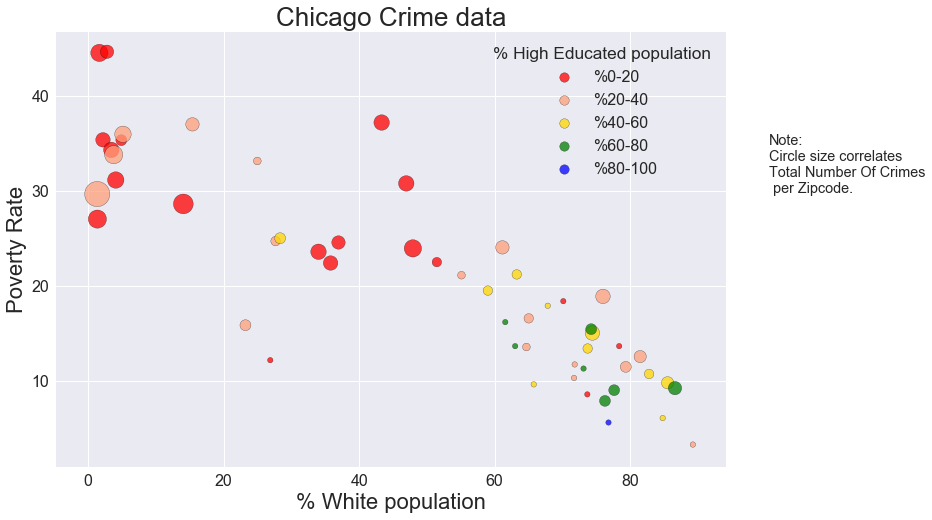

In [85]:
#Categoring the education level
bins = [0,20,40,60,80,100]
labels = ["%0-20", "%20-40", "%40-60","%60-80","%80-100"]
census_crime_zipcode_df["Education Bins"] = pd.cut(census_crime_zipcode_df["% High Educated"],bins = bins, labels = labels)

#Buble plot
less20 = census_crime_zipcode_df[census_crime_zipcode_df["Education Bins"]=="%0-20"]

twenty40 = census_crime_zipcode_df[census_crime_zipcode_df["Education Bins"]=="%20-40"]

forty60 = census_crime_zipcode_df[census_crime_zipcode_df["Education Bins"]=="%40-60"]

sixty80 = census_crime_zipcode_df[census_crime_zipcode_df["Education Bins"]=="%60-80"]

eighty100 = census_crime_zipcode_df[census_crime_zipcode_df["Education Bins"]=="%80-100"]

plt.figure(figsize = (12,8))

less20plot = plt.scatter(less20["% White population"], less20["Poverty Rate"],
            s =less20["Total Crimes"]*30, c = "r",
           alpha = .75,edgecolors="black", label = "%0-20")

twenty40plot = plt.scatter(twenty40["% White population"], twenty40["Poverty Rate"],
            s =twenty40["Total Crimes"]*30, c = "lightsalmon",
           alpha = .75,edgecolors="black", label = "%20-40")

forty60plot = plt.scatter(forty60["% White population"], forty60["Poverty Rate"],
            s =forty60["Total Crimes"]*30, c = "gold",
           alpha = .75,edgecolors="black", label = "%40-60")

sixty80plot = plt.scatter(sixty80["% White population"], sixty80["Poverty Rate"],
            s =sixty80["Total Crimes"]*30, c = "g",
           alpha = .75,edgecolors="black", label = "%60-80")

eighty100 = plt.scatter(eighty100["% White population"], eighty100["Poverty Rate"],
            s =eighty100["Total Crimes"]*30, c = "b",
           alpha = .75,edgecolors="black", label = "%80-100")

# Incorporate the other graph properties
plt.title("Chicago Crime data", fontsize = 26)
plt.ylabel("Poverty Rate", fontsize = 22)
plt.xlabel("% White population", fontsize = 22)
plt.figtext(0.95, 0.6, 'Note:\nCircle size correlates\nTotal Number Of Crimes\n per Zipcode.', fontsize='x-large')

legend = plt.legend(handles = [less20plot,twenty40plot,forty60plot,sixty80plot,eighty100],loc="best", fontsize = 16)
legend.set_title("% High Educated population")
plt.setp(legend.get_title(),fontsize='xx-large')

legend.legendHandles[0]._sizes = [90]
legend.legendHandles[1]._sizes = [90]
legend.legendHandles[2]._sizes = [90]
legend.legendHandles[3]._sizes = [90]
legend.legendHandles[4]._sizes = [90]

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)


# Show plot
plt.show()

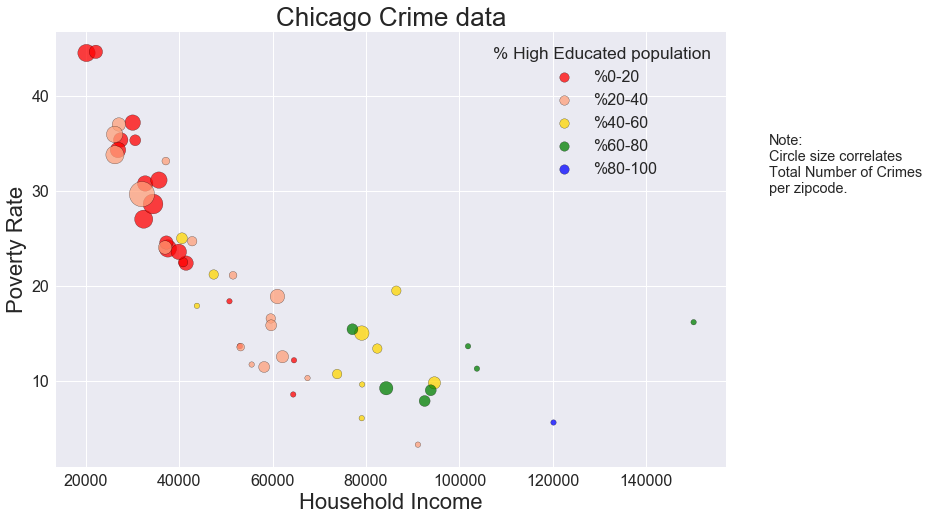

In [89]:

bins = [0,20,40,60,80,100]
labels = ["%0-20", "%20-40", "%40-60","%60-80","%80-100"]
census_crime_zipcode_df["Education Bins"] = pd.cut(census_crime_zipcode_df["% High Educated"],bins = bins, labels = labels)


less20 = census_crime_zipcode_df[census_crime_zipcode_df["Education Bins"]=="%0-20"]

twenty40 = census_crime_zipcode_df[census_crime_zipcode_df["Education Bins"]=="%20-40"]

forty60 = census_crime_zipcode_df[census_crime_zipcode_df["Education Bins"]=="%40-60"]

sixty80 = census_crime_zipcode_df[census_crime_zipcode_df["Education Bins"]=="%60-80"]

eighty100 = census_crime_zipcode_df[census_crime_zipcode_df["Education Bins"]=="%80-100"]


# Incorporate the other graph properties
plt.figure(figsize = (12,8))

less20plot = plt.scatter(less20["Household Income"], less20["Poverty Rate"],
            s =less20["Total Crimes"]*30, c = "r",
           alpha = .75,edgecolors="black", label = "%0-20")

twenty40plot = plt.scatter(twenty40["Household Income"], twenty40["Poverty Rate"],
            s =twenty40["Total Crimes"]*30, c = "lightsalmon",
           alpha = .75,edgecolors="black", label = "%20-40")

forty60plot = plt.scatter(forty60["Household Income"], forty60["Poverty Rate"],
            s =forty60["Total Crimes"]*30, c = "gold",
           alpha = .75,edgecolors="black", label = "%40-60")

sixty80plot = plt.scatter(sixty80["Household Income"], sixty80["Poverty Rate"],
            s =sixty80["Total Crimes"]*30, c = "g",
           alpha = .75,edgecolors="black", label = "%60-80")

eighty100 = plt.scatter(eighty100["Household Income"], eighty100["Poverty Rate"],
            s =eighty100["Total Crimes"]*30, c = "b",
           alpha = .75,edgecolors="black", label = "%80-100")

plt.title("Chicago Crime data", fontsize = 26)
plt.ylabel("Poverty Rate", fontsize = 22)
plt.xlabel("Household Income", fontsize = 22)
plt.figtext(0.95, 0.6, 'Note:\nCircle size correlates\nTotal Number of Crimes\nper zipcode.', fontsize = "x-large")

# Create a legend
legend = plt.legend(handles = [less20plot,twenty40plot,forty60plot,sixty80plot,eighty100],loc="best", fontsize = 16)
legend.set_title("% High Educated population")
plt.setp(legend.get_title(),fontsize='xx-large')

legend.legendHandles[0]._sizes = [90]
legend.legendHandles[1]._sizes = [90]
legend.legendHandles[2]._sizes = [90]
legend.legendHandles[3]._sizes = [90]
legend.legendHandles[4]._sizes = [90]

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

# Save Figure
#plt.savefig("Bubble Plot of Ride Sharing Data")
# Show plot
plt.show()